# Import Necessary Libraries 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load and explore data

In [5]:
df = pd.read_csv('Student_Performance.csv')

print("Dataset Info:")
print(df.info())
print("\nUnique values in each column:")
for column in df.columns:
    print(f"\n{column}:", df[column].unique())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None

Unique values in each column:

Hours Studied: [7 4 8 5 3 6 2 1 9]

Previous Scores: [99 82 51 52 75 78 73 45 77 89 91 79 47 72 83 54 96 74 85 61 62 84 94 90
 44 70 67 97 59 55 68 63 46 76 43 81 93 98 48 92 64 88 60 87 40 69 80 95
 49 50 53 71 56 58 66 65 57 41 42 86]

Extracurricular Activities: ['Yes' '

# Data preprocessing 

In [8]:
def preprocess_data(df):
    df_processed = df.copy()
    
    label_encoders = {}
    for column in df_processed.columns:
        if df_processed[column].dtype == 'object':
            label_encoders[column] = LabelEncoder()
            df_processed[column] = label_encoders[column].fit_transform(df_processed[column].astype(str))
    
    df_processed = df_processed.fillna(df_processed.mean())
    
    return df_processed, label_encoders

df_processed, label_encoders = preprocess_data(df)

print("\nProcessed data head:")
print(df_processed.head())

target_column = 'Performance Index'  # adjust this if needed
X = df_processed.drop(target_column, axis=1)
y = df_processed[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

final_model = RandomForestRegressor(random_state=42)
final_model.fit(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
print("\nScaled training data head:")
print(X_train_scaled_df.head())


Processed data head:
   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  

Scaled training data head:
   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0       0.006455        -1.183844                   -0.989307

# Preprocessing 

In [10]:
def preprocess_data(df):
    df_processed = df.copy()
    
    categorical_columns = df_processed.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        df_processed[column] = df_processed[column].map({'Yes': 1, 'No': 0})
        print(f"Converted {column} values:", df_processed[column].unique())
    
    return df_processed

df_processed = preprocess_data(df)

print("\nProcessed Data:")
print(df_processed.head())

Converted Extracurricular Activities values: [1 0]

Processed Data:
   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


# Split and Scale Data

In [14]:
target_column = 'Performance Index'
X = df_processed.drop(target_column, axis=1)
y = df_processed[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures shape:", X_train_scaled.shape)
print("Target shape:", y_train.shape)


Features shape: (8000, 5)
Target shape: (8000,)


# Train Model

In [17]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'model': model,
        'mse': mse,
        'r2': r2,
        'predictions': y_pred
    }
    
    print(f"Results for {name}:")
    print(f"MSE: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")


Training Linear Regression...
Results for Linear Regression:
MSE: 4.0826
R² Score: 0.9890

Training Ridge Regression...
Results for Ridge Regression:
MSE: 4.0832
R² Score: 0.9890

Training Lasso Regression...
Results for Lasso Regression:
MSE: 7.5168
R² Score: 0.9797

Training Random Forest...
Results for Random Forest:
MSE: 5.1719
R² Score: 0.9860


# Feature Importance

In [19]:
rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                            Feature  Importance
1                   Previous Scores    0.847028
0                     Hours Studied    0.141622
4  Sample Question Papers Practiced    0.005188
3                       Sleep Hours    0.004818
2        Extracurricular Activities    0.001343


# Prediction Function

In [23]:
def predict_student_performance(new_data, model=None):

    if isinstance(new_data, dict):
        new_data = pd.DataFrame([new_data])
    
    for column in new_data.columns:
        if new_data[column].dtype == 'object':
            new_data[column] = new_data[column].map({'Yes': 1, 'No': 0})
    
    new_data_scaled = scaler.transform(new_data)
    
    if model is None:
        model = results['Random Forest']['model']
    
    prediction = model.predict(new_data_scaled)
    return prediction[0]

new_student = {
    'hours_studied': 10,
    'previous_scores': 85,
    'extracurricular_activities': 1,  
    'sleep_hours': 7,
    'sample_papers_practiced': 5
}

try:
    prediction = predict_student_performance(new_student)
    print(f"\nPredicted Performance Index for new student: {prediction:.2f}")
except Exception as e:
    print(f"Error making prediction: {str(e)}")
    print("Current columns in training data:", X.columns.tolist())

Error making prediction: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- extracurricular_activities
- hours_studied
- previous_scores
- sample_papers_practiced
- sleep_hours
Feature names seen at fit time, yet now missing:
- Extracurricular Activities
- Hours Studied
- Previous Scores
- Sample Question Papers Practiced
- Sleep Hours

Current columns in training data: ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']


# Visualizations

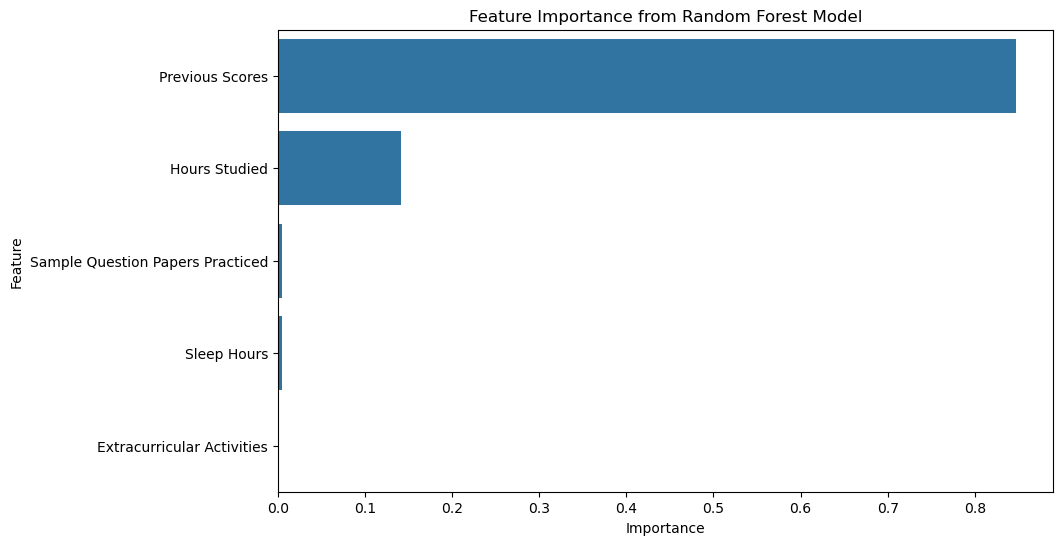

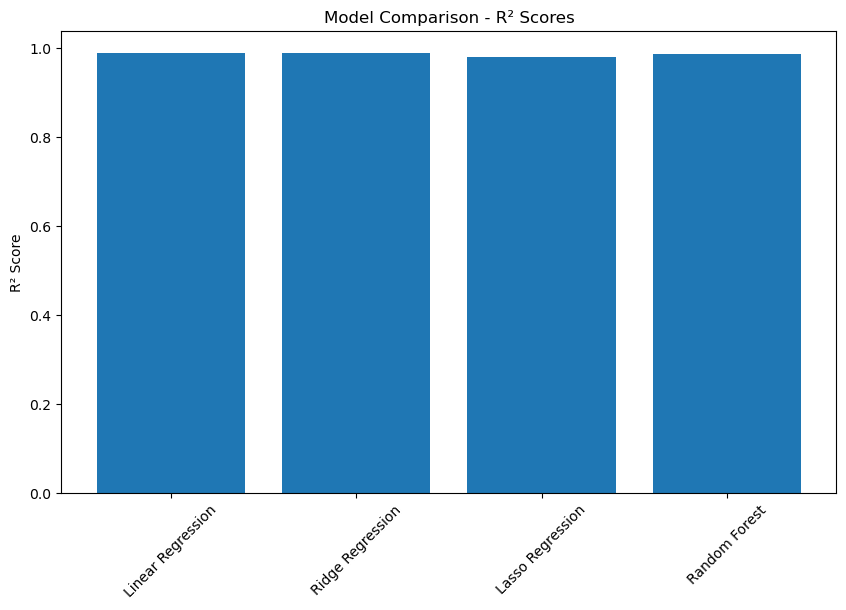

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature Importance from Random Forest Model')
plt.show()

plt.figure(figsize=(10, 6))
model_names = list(results.keys())
r2_scores = [results[model]['r2'] for model in model_names]
plt.bar(model_names, r2_scores)
plt.title('Model Comparison - R² Scores')
plt.xticks(rotation=45)
plt.ylabel('R² Score')
plt.show()

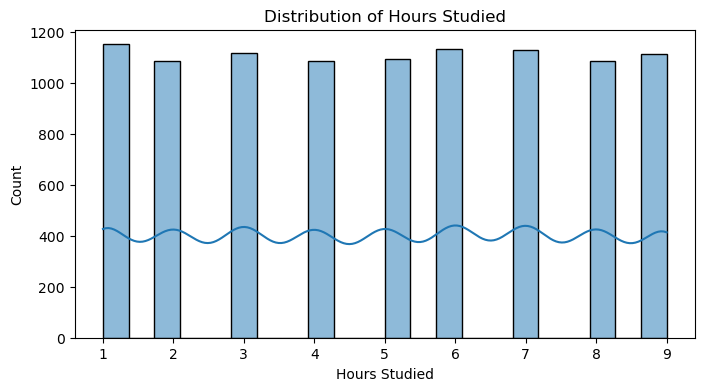

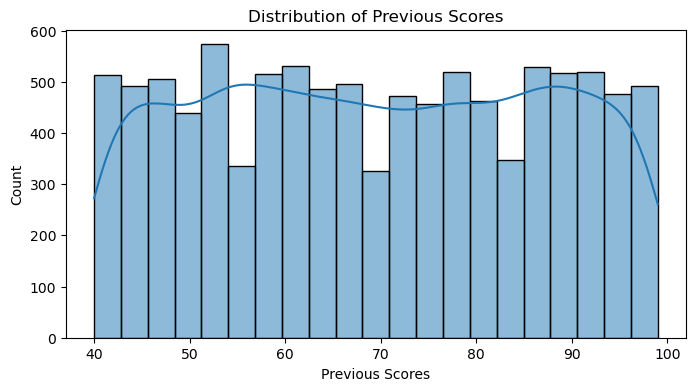

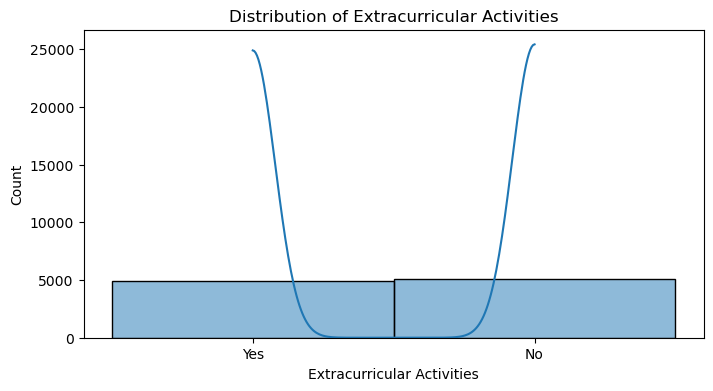

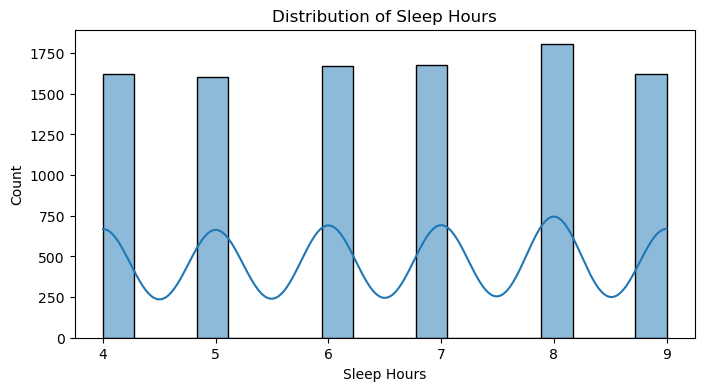

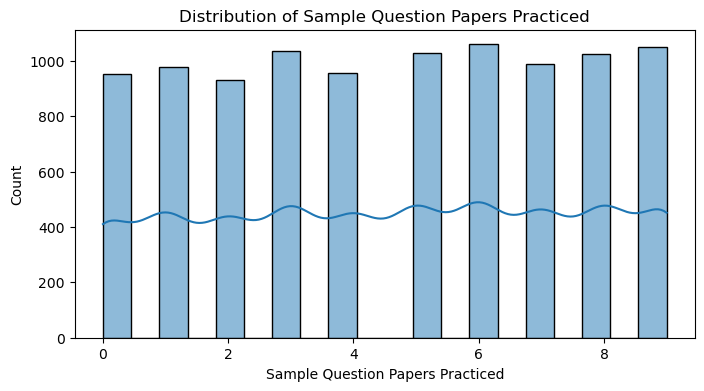

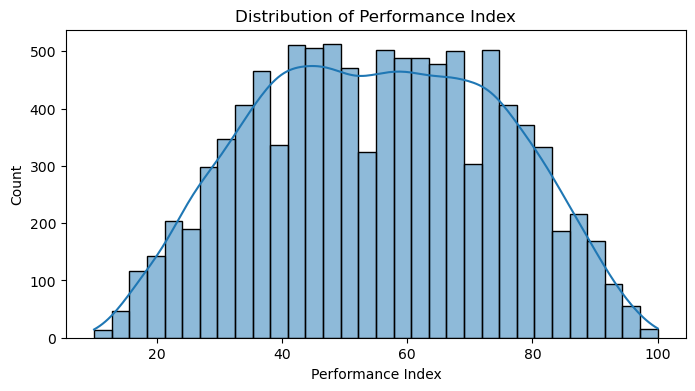

In [28]:
for column in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

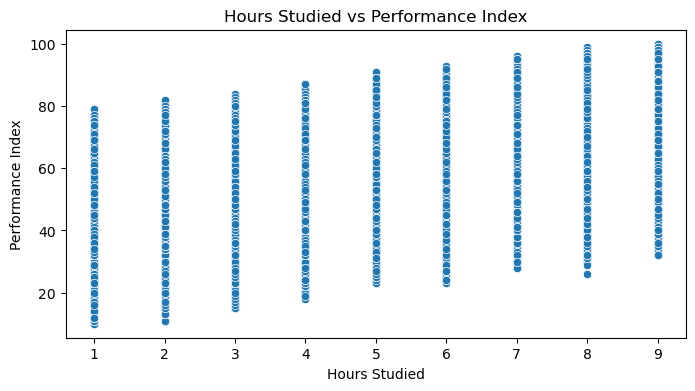

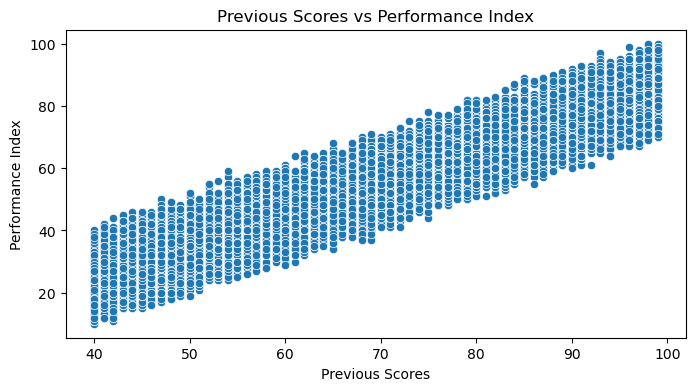

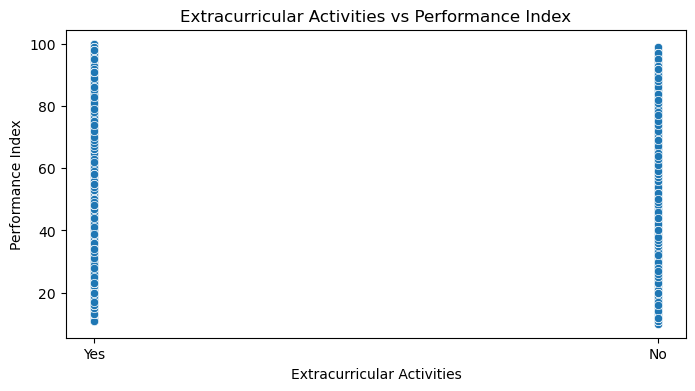

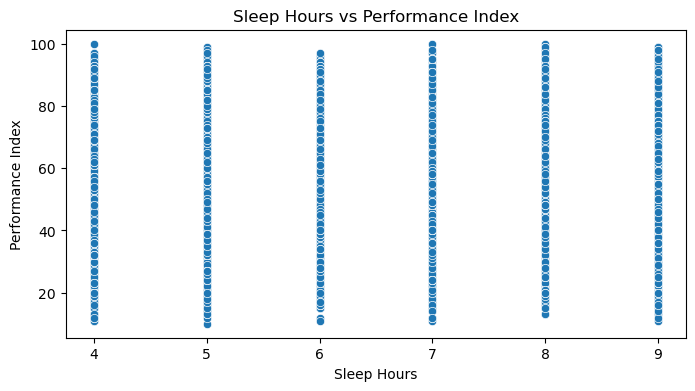

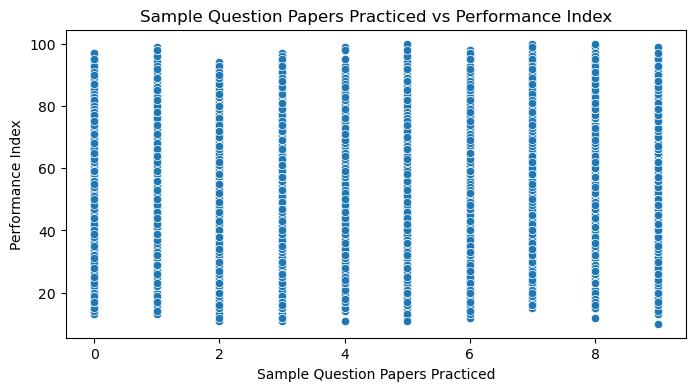

In [29]:
target = 'Performance Index'  
for column in df.columns:
    if column != target:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data=df, x=column, y=target)
        plt.title(f"{column} vs {target}")
        plt.show()

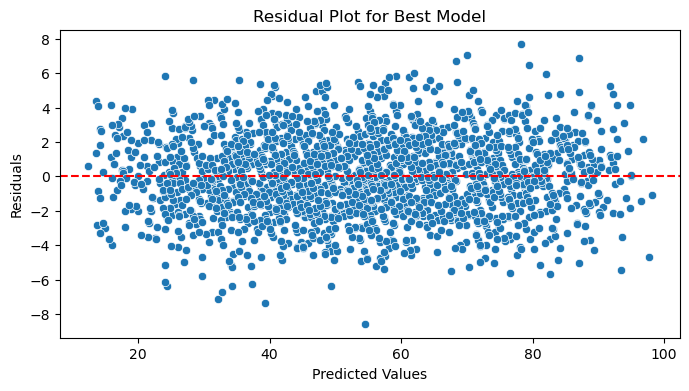

In [31]:
predictions = final_model.predict(X_test)
residuals = y_test - predictions

plt.figure(figsize=(8, 4))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residual Plot for Best Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

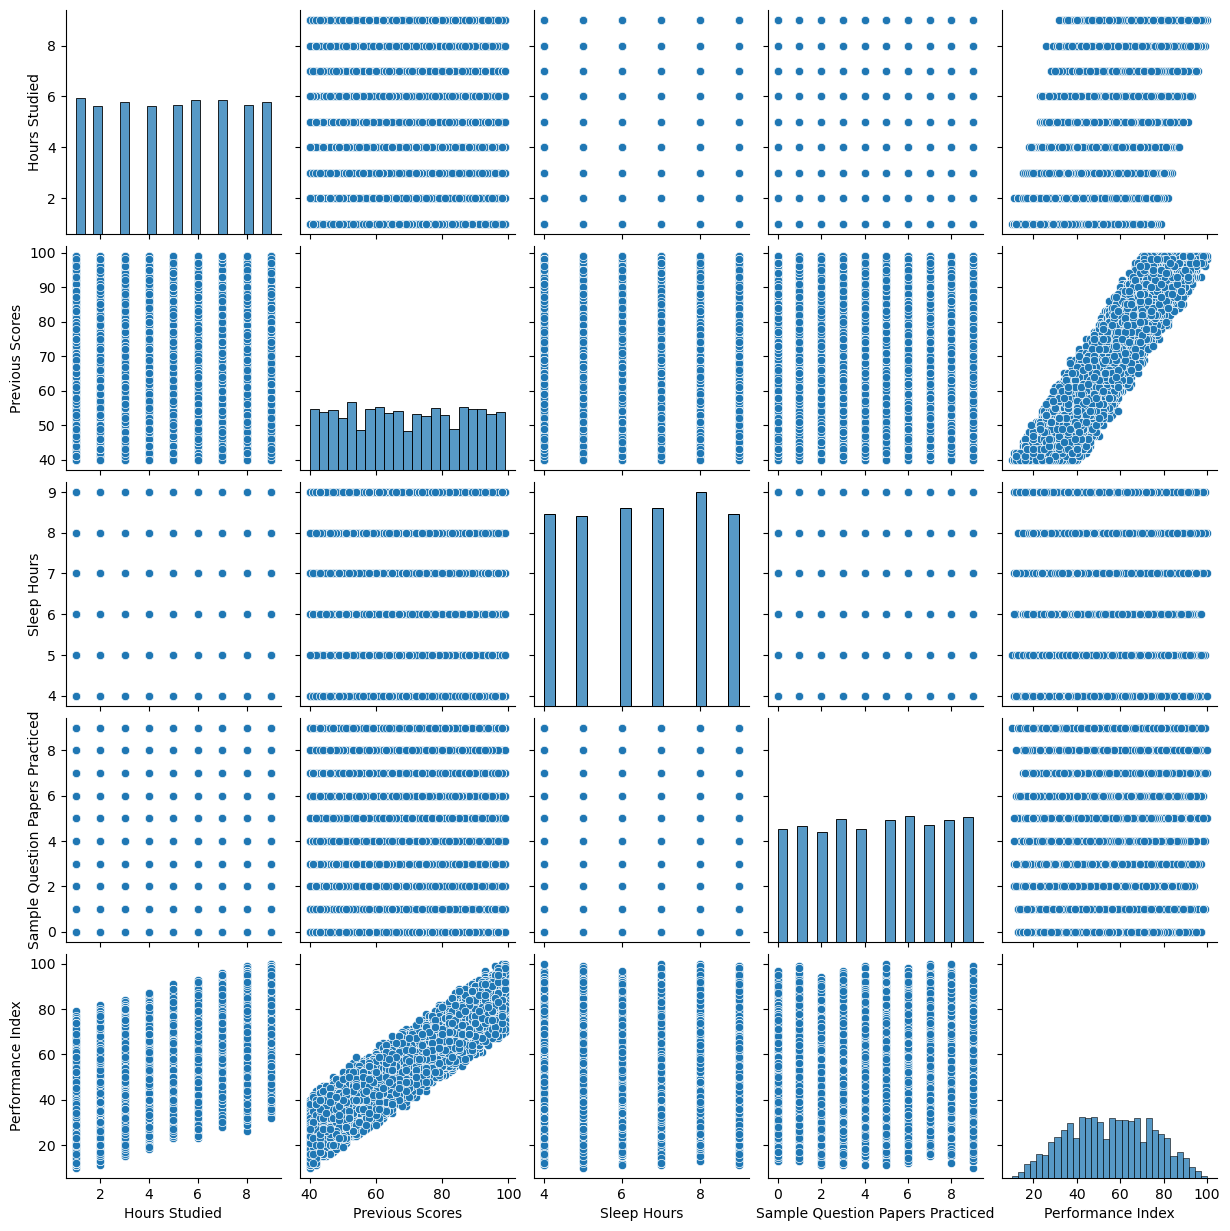

In [32]:
sns.pairplot(df)
plt.show()

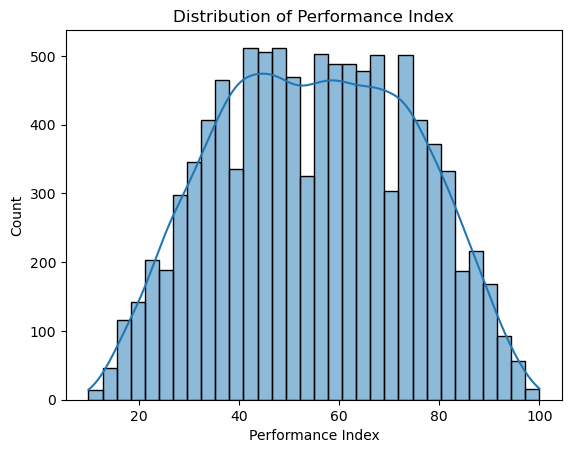

In [42]:
sns.histplot(df['Performance Index'], kde=True)
plt.title("Distribution of Performance Index")
plt.show()